In [1]:
import numpy as np
import pandas as pd
from scipy import special
from numpy.random import randn
from numpy.matlib import repmat

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
np.random.seed(123)

In [4]:
import sys
sys.path.append('../')

In [5]:
from probit_ppca import probitPPCA

### UCI heart dataset

In [6]:
## https://archive.ics.uci.edu/ml/datasets/spect+heart
## first column is target (binary), all other 22 cols are binary features 0 and 1
## when doing probic PCA, transfer 0 to -1 

In [7]:
heart_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECT.train", header=None)

In [8]:
Y = heart_data.ix[:, 1:].values
## keep binary values to be 1 and -1
Y[Y==0] = -1

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [9]:
probit_ppca = probitPPCA(D = 2, n_iters = 200, verbose=False)
probit_ppca.fit(Y)

In [10]:
## show the reconstruction performance for probit PPCA

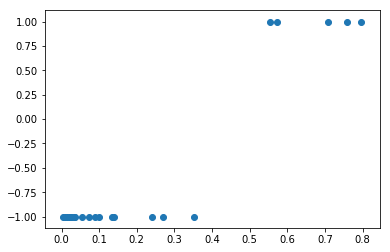

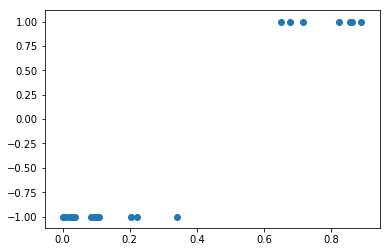

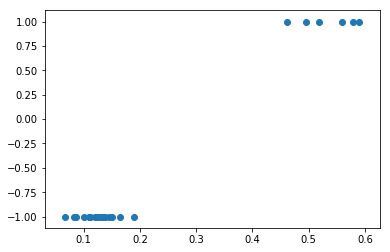

In [11]:
for i in range(3):
    plt.figure()
    plt.scatter(probit_ppca.recover()[i], Y[i])

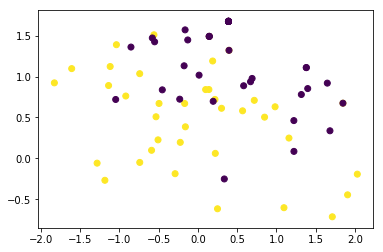

In [12]:
plt.scatter(probit_ppca.e_X[:, 0], probit_ppca.e_X[:, 1], c = heart_data[0].values)

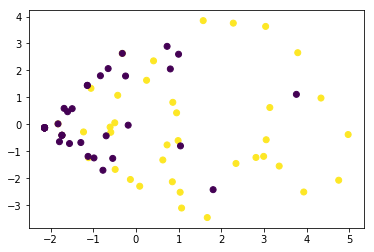

In [13]:
## sklearn PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
res = pca.fit_transform(Y)
plt.scatter(res[:, 0], res[:, 1], c = heart_data[0].values)

### manually make some missing data to test Z

In [14]:
## set some missing data here
for i in range(10):
    rowindex = np.random.randint(Y.shape[0])
    colindex = np.random.randint(Y.shape[1])
#     print rowindex, colindex
    Y[rowindex][colindex] = 0

In [15]:
probit_ppca = probitPPCA(D = 2, n_iters = 200, verbose=False)
probit_ppca.fit(Y)

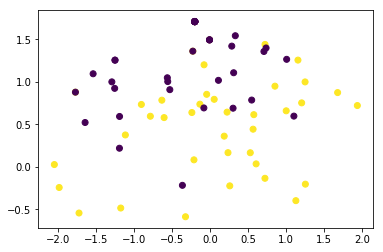

In [16]:
plt.scatter(probit_ppca.e_X[:, 0], probit_ppca.e_X[:, 1], c = heart_data[0].values)